> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

It's a dataset including information about 10,000 movies collected from
The Movie Database (TMDb),including user ratings and revenue;

● Certain columns, like ‘cast’and ‘genres’, contain multiple values separated by pipe (|)characters.

● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.  

The required is determining the most popular genres from year to year and, what kinds of properties are associated with movies that have high revenues?

In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv(r'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.shape

(10866, 21)

In [8]:
df.count()

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df=df.drop(columns =['revenue_adj','cast','homepage','tagline','budget_adj','imdb_id'])
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 :Which genres are most popular from year to year?

In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
dg = df['genres'].str.get_dummies(sep='|')
dgs=dg.sum().reset_index()


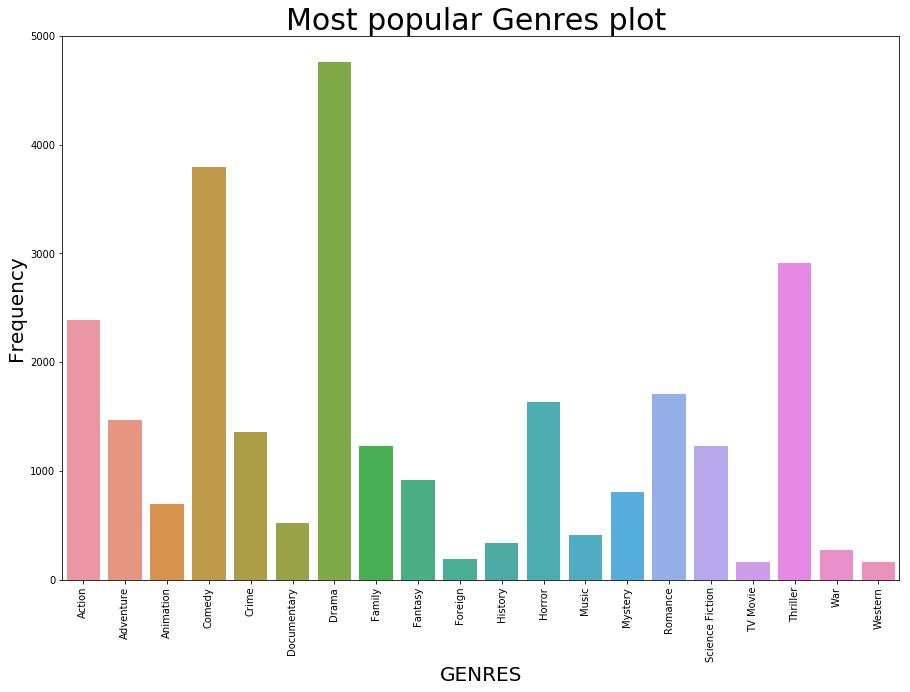

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x=dg.columns,y=dg.sum(),data=dgs)
plt.title('Most popular Genres plot ',fontsize= 30)
plt.ylabel('Frequency',fontsize= 20)
plt.xlabel('GENRES',fontsize= 20)
plt.xticks(rotation=90)
plt.show()

### From the above plot, I had notifiedthat the most-watched movies on IMDb underlining Drama, comedy, and Thriller types.

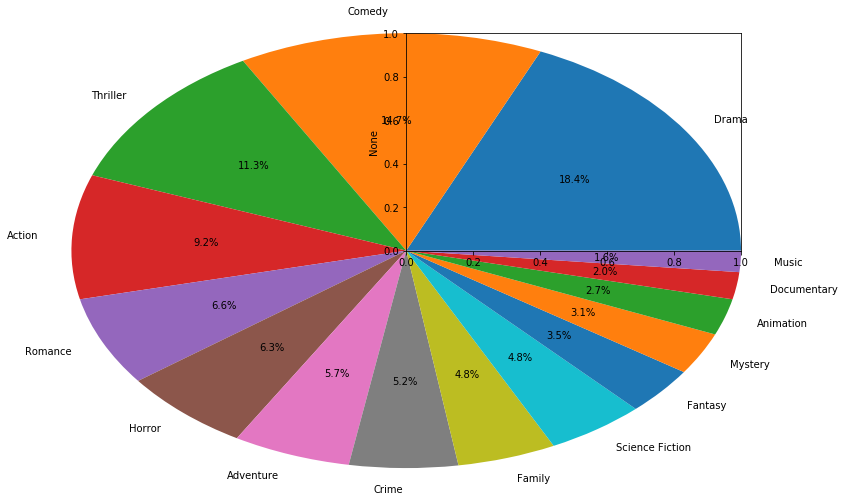

In [12]:
dg = df['genres'].str.get_dummies(sep='|')
dge=dg[dg.columns].apply(lambda x: sum(x.values))
dge.sort_values(0,ascending=False).head(15).plot.pie(autopct="%1.1f%%",frame=True)
plt.show()

### the above plot is another analysis technique to investigate the type of most-watched movies on IMDb.

### Research Question 2  :What kinds of properties are associated with movies that have high revenues?

In [87]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
print(df.genres[df['revenue']==df['revenue'].max()])
print(df.original_title[df['revenue']==df['revenue'].max()])

1386    Action|Adventure|Fantasy|Science Fiction
Name: genres, dtype: object
1386    Avatar
Name: original_title, dtype: object


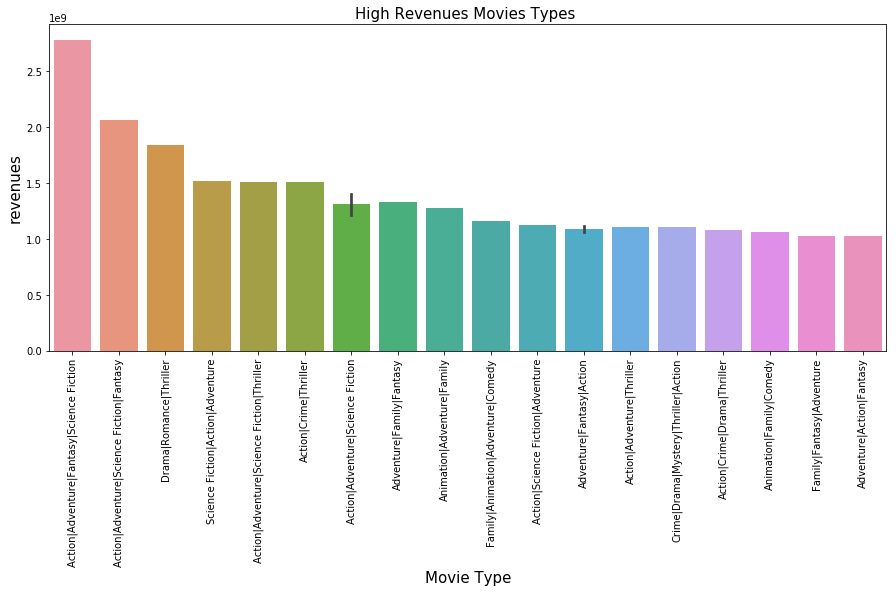

In [94]:
plt.figure(figsize=(15,6))
re=df[['genres','revenue']].sort_values('revenue',ascending= False).head(20)
sns.barplot(x='genres',y='revenue',data=re)
plt.title('High Revenues Movies Types ',fontsize= 15)
plt.xlabel('Movie Type',fontsize= 15)
plt.ylabel('revenues',fontsize= 15)
plt.xticks(rotation=90)
plt.show()

### From the above plot, I had notified that the ten movies with high profit are assoicated with movie genres and the repeated genres between them is action movies.

In [90]:
print(df.original_title[df['budget']==df['budget'].max()])
print(df.genres[df['budget']==df['budget'].max()])

2244    The Warrior's Way
Name: original_title, dtype: object
2244    Adventure|Fantasy|Action|Western|Thriller
Name: genres, dtype: object


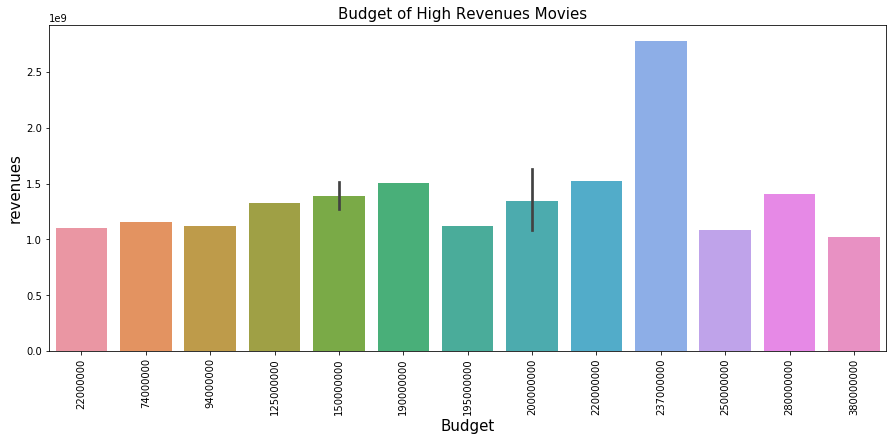

In [95]:
plt.figure(figsize=(15,6))
re=df[['budget','revenue']].sort_values('revenue',ascending= False).head(20)
sns.barplot(x='budget',y='revenue',data=re)
plt.title('Budget of High Revenues Movies  ',fontsize= 15)
plt.xlabel('Budget',fontsize= 15)
plt.ylabel('revenues',fontsize= 15)
plt.xticks(rotation=90)
plt.show()

### Here in the above plot is another analysis type in which classified the ten movies with a high profit due to the budget and it is notified that there is a relative direct proportional relationship between the profit and profit.

<a id='conclusions'></a>
## Conclusions

From the above analysis we can exclude the following notices as the answer to the required question:

-The most popular movie genres are Drama, comedy, and Thriller.

-the highest revenue movies are common in the movie stereotype as most of them are action movies.

-By another sorting respective to the budget, the highest revenues movies are having a relatively high budget.

LIMITES: the classification of the movies of high revenues is not covered totally cause there are several common factors that could affect the profit from each movie some of them depend on audience ages and the target fans in each country.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [13]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0